In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = 'https://fbref.com/en/comps/182/NWSL-Stats'
df = pd.read_html(url, attrs={'id': 'results20241821_overall'})[0]

In [3]:
df.head()

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper,Notes
0,1,Pride,11,8,3,0,20,10,10,27,2.45,19.8,12.3,7.5,0.68,W W W W W,6866,Barbra Banda - 8,Anna Moorhouse,NaN
1,2,Current,11,7,4,0,26,15,11,25,2.27,24.9,9.9,15.0,1.37,D D W D W,6900,Temwa Chawinga - 5,Adrianna Franch,NaN
2,3,Spirit,11,8,0,3,25,16,9,24,2.18,20.3,12.5,7.8,0.71,W L W W W,8589,Ouleymata Sarr - 6,Aubrey Kingsbury,NaN
3,4,Thorns,11,6,1,4,24,16,8,19,1.73,20.6,15.1,5.4,0.49,W W W W L,18279,Sophia Smith - 8,Shelby Hogan,NaN
4,5,Gotham,10,5,3,2,10,7,3,18,1.80,14.5,11.4,3.1,0.31,W W D W W,5896,Ella Stevens - 4,Ann-Katrin Berger,NaN


In [4]:
#calculate per90
df[['xG', 'xGA']] = df[['xG', 'xGA']].astype(float)

df['xG_per_90'] = (df['xG'] / 900) * 90
df['xGA_per_90'] = (df['xGA'] / 900) * 90

Text(0.075, 0.005, 'Data: FBREF\n@freddys_canvas')

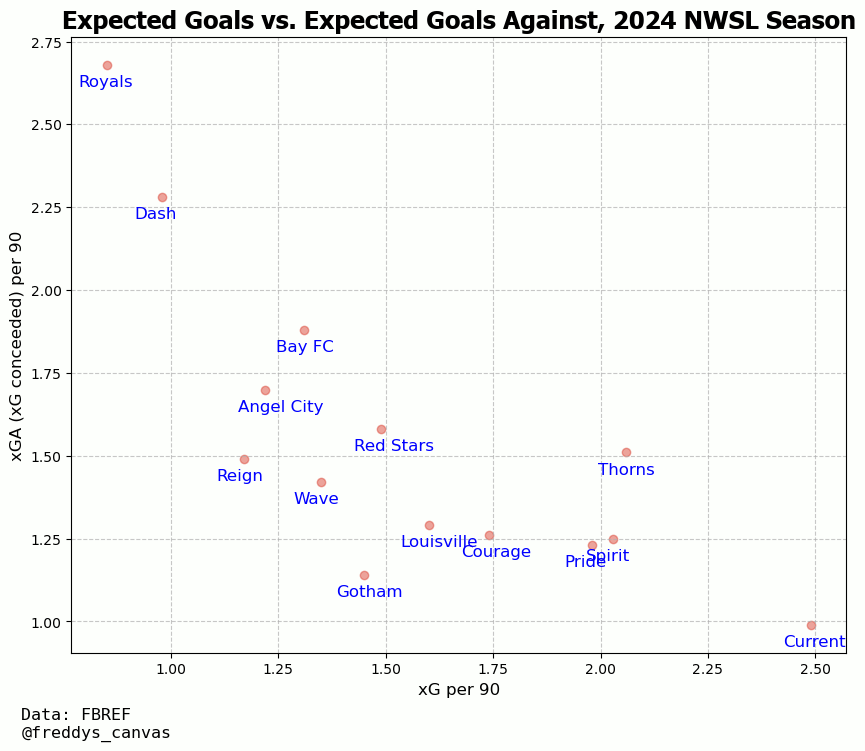

In [13]:
#draw plots
fig, ax = plt.subplots(figsize=(10,8), facecolor='#FDFFFC')


plt.scatter(df['xG_per_90'], df['xGA_per_90'], alpha=.5, color='#DC493A')

ax.set_facecolor(color='#FDFFFC')

ax.set_xlabel('xG per 90', fontsize=12)
ax.set_ylabel('xGA (xG conceeded) per 90', fontsize=12)
ax.set_title('Expected Goals vs. Expected Goals Against, 2024 NWSL Season', fontsize=18
            , fontfamily='Tahoma', fontweight='semibold')

plt.grid(True, linestyle='--', alpha=0.7)

#add labels

teams = df['Squad']
xG = df['xG_per_90']
xGA = df['xGA_per_90']


for i, team in enumerate(teams):
    plt.text(xG[i] - 0.065, xGA[i] - 0.065, team, 
            fontsize=12, color='blue')
    
#add credits
CREDIT_1 = "Data: FBREF"
CREDIT_2 = "@freddys_canvas"

fig.text(
    0.075, 0.005, f"{CREDIT_1}\n{CREDIT_2}", size=12,
    fontfamily="monospace", color="#000000",
    ha="left"
)

In [19]:
#save plot as an image
fig.savefig('C:/Users/fredd/OneDrive/Pictures/xG_scatterplot.png', dpi=300, bbox_inches='tight')